In [2]:
# FaceBook Visualizations
import pandas as pd
# %%
# Imports
import pandas as pd
from datetime import datetime
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import seaborn as sns
from multiprocessing import freeze_support

### Facebook Search Data Set

In [3]:
df_s = pd.read_csv('/Users/samharris/Desktop/Personal_Workspace/DSSD/Facebook_analysis/sam_scrap_facebook.csv')

In [4]:
# Normalize the text: lowercase, remove punctuation and numbers, strip leading/trailing spaces
df_s['text_normalized'] = df_s['Content'].str.lower()
df_s['text_normalized'] = df_s['text_normalized'].apply(
    lambda x: re.sub(r'[\d.,!?"\':;]', '', x))
df_s['text_normalized'] = df_s['text_normalized'].str.strip()

In [5]:
# Remove 'See more' from the end of strings
df_s['text_normalized'] = df_s['text_normalized'].str.rstrip('… see more').str.rstrip() 

In [6]:
df_s['text_normalized'][15]

'while the evacuation of #yellowknife continues it is also time to start saying thank you to the youralberta (government of alberta) and all of the municipalit'

In [7]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


# Apply the function to your dataframe
df_s['sentiment'] = df_s['text_normalized'].apply(
    get_sentiment)

In [8]:
df_s.head()

,Content,Reactions,Comments,Reposts,Poster,Location,text_normalized,sentiment
0,H here!i became a full-time housesitter as of ...,66,21 comments,21 comments,Yellowknife House Sitting,NaN,h herei became a full-time housesitter as of a...,-0.016667
1,We’ve put together a timeline of our experienc...,43,4 comments,4 comments,Yellowknife Women's Society,NaN,we’ve put together a timeline of our experienc...,0.116667
2,Hello to our Yellowknife clients. We have rece...,6,5 comments,5 comments,Avid Insurance Group - North,NaN,hello to our yellowknife clients we have recei...,0.225000
3,*Please note due to evacuation orders to both ...,2,NaN,NaN,Norland Insurance Agencies Ltd,NaN,*please note due to evacuation orders to both ...,-0.125000
4,"As wildfires continue to spread, we are seeing...",38,14 comments,14 comments,The Explorer Hotel,NaN,as wildfires continue to spread we are seeing ...,0.500000


In [10]:
# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new column with sentiment categories
df_s['Sentiment_Category'] = df_s['sentiment'].apply(categorize_sentiment)

# Group by sentiment category and count occurrences
grouped_data = df_s.groupby('Sentiment_Category').size()

# Print the result
print(grouped_data)

Sentiment_Category
Negative    213
Neutral     263
Positive    474
dtype: int64


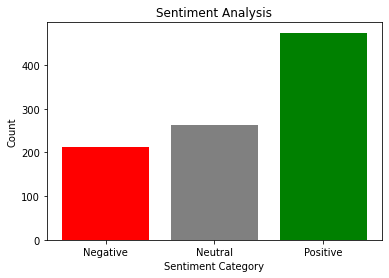

In [11]:
# Plotting the bar chart
plt.bar(grouped_data.index, grouped_data.values, color=['red', 'grey', 'green'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

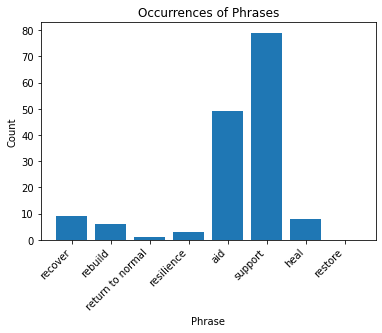

In [15]:
# Define the list of keywords related to resilience and recovery
keywords = ["recover", "rebuild", "return to normal",
            "resilience", "aid", "support", "heal", "restore"]

# Function to count the occurrences of each phrase in the tweets
def count_phrases(text, phrases):
    phrase_count = {}
    for phrase in phrases:
        count = text.count(phrase)
        phrase_count[phrase] = count
    return phrase_count

# Count occurrences of each phrase in each tweet
df_s['phrase_counts'] = df_s['text_normalized'].apply(lambda text: count_phrases(text, keywords))

# Sum up the counts for each phrase across all tweets
total_phrase_counts = {}
for index, row in df_s.iterrows():
    for phrase, count in row['phrase_counts'].items():
        total_phrase_counts[phrase] = total_phrase_counts.get(phrase, 0) + count

# Create a bar chart of the total occurrences of each phrase
plt.bar(total_phrase_counts.keys(), total_phrase_counts.values())
plt.xlabel('Phrase')
plt.ylabel('Count')
plt.title('Occurrences of Phrases')
plt.xticks(rotation=45, ha='right')
plt.show()

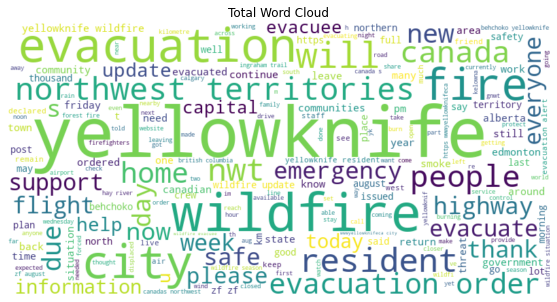

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(df_s['text_normalized'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Total Word Cloud')
plt.show()

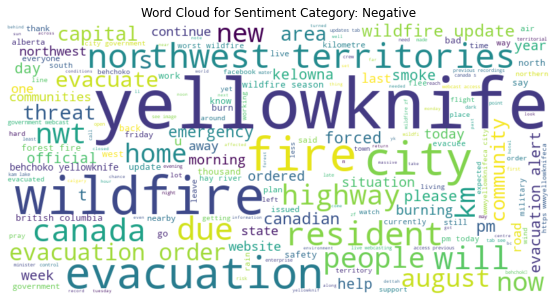

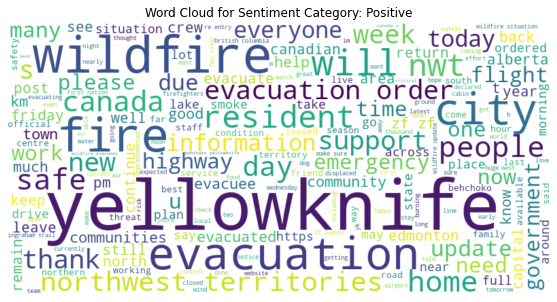

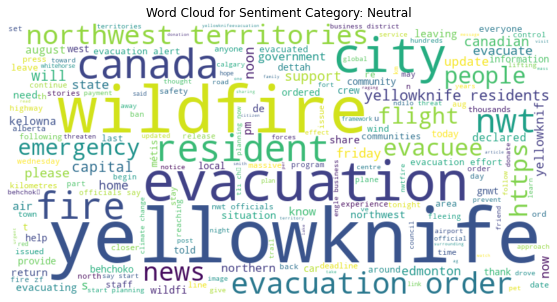

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df_s is your DataFrame containing the text data and sentiment categories

sentiment_categories = df_s['Sentiment_Category'].unique()

# Generate word clouds for each sentiment category
for sentiment_category in sentiment_categories:
    text = ' '.join(df_s[df_s['Sentiment_Category'] == sentiment_category]['text_normalized'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment Category: {sentiment_category}')
    plt.show()


### There is limited location data but lets visualize what we have

In [31]:
df_s

,Content,Reactions,Comments,Reposts,Poster,Location,text_normalized,sentiment,Sentiment_Category,keyword_count,phrase_counts
0,H here!i became a full-time housesitter as of ...,66,21 comments,21 comments,Yellowknife House Sitting,NaN,h herei became a full-time housesitter as of a...,-0.016667,Negative,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
1,We’ve put together a timeline of our experienc...,43,4 comments,4 comments,Yellowknife Women's Society,NaN,we’ve put together a timeline of our experienc...,0.116667,Positive,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
2,Hello to our Yellowknife clients. We have rece...,6,5 comments,5 comments,Avid Insurance Group - North,NaN,hello to our yellowknife clients we have recei...,0.225000,Positive,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
3,*Please note due to evacuation orders to both ...,2,NaN,NaN,Norland Insurance Agencies Ltd,NaN,*please note due to evacuation orders to both ...,-0.125000,Negative,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
4,"As wildfires continue to spread, we are seeing...",38,14 comments,14 comments,The Explorer Hotel,NaN,as wildfires continue to spread we are seeing ...,0.500000,Positive,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
...,...,...,...,...,...,...,...,...,...,...,...
945,Yellowknife Canada City empties as thousands f...,1.0,1 comment,1 comment,Carlisle Dixon,NaN,yellowknife canada city empties as thousands f...,0.200000,Positive,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
946,https://thewesterner.blogspot.com/.../wildfire...,1.0,NaN,NaN,The Westerner - News & Commentary,NaN,https//thewesternerblogspotcom//wildfire-trigg,0.000000,Neutral,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
947,Cool! You can buy a fire? Seems it comes with ...,9.0,3 comments,3 comments,Suzanne Carriere,NaN,cool you can buy a fire seems it comes with he...,-0.072222,Negative,0,"{'recover': 0, 'rebuild': 0, 'return to normal..."
948,The City of Yellowknife and a nearby First Nat...,341.0,NaN,NaN,CTV News,NaN,the city of yellowknife and a nearby first nat...,0.375000,Positive,1,"{'recover': 0, 'rebuild': 0, 'return to normal..."


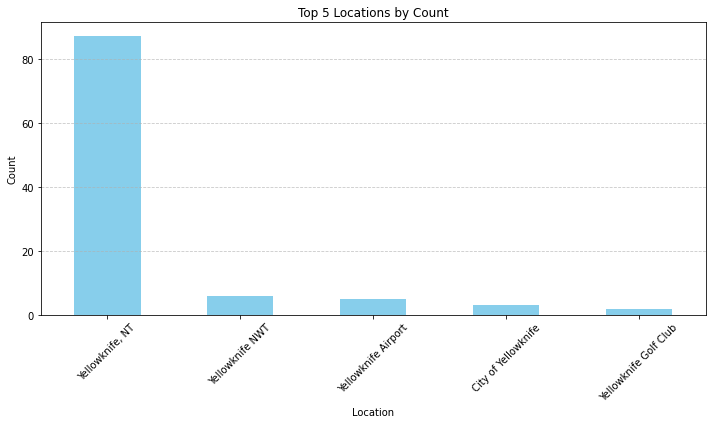

In [38]:
# Count the occurrences of each location
location_counts = df_s['Location'].value_counts()

# Select only the top 10 locations
top_10_locations = location_counts.head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Locations by Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()